In [2]:
import numpy as np
import numpy.linalg as nplg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Problem - 1 (K-means)

In [3]:
# Generate Gaussian Samples 

models = np.array([1,2,3])
weights = np.array([0.2,0.5,0.3])

mean1 = np.array([0,0])
cov1 = np.array([[1,0],[0,1]])

mean2 = np.array([3,0])
cov2 = np.array([[1,0],[0,1]])

mean3 = np.array([0,3])
cov3 = np.array([[1,0],[0,1]])

samples = []

for i in range(500):
    
    select = np.random.choice(models,p=weights)    
    if select == 1:
        samples.append(np.random.multivariate_normal(mean1, cov1))
    if select == 2:
        samples.append(np.random.multivariate_normal(mean2, cov2))
    if select == 3:
        samples.append(np.random.multivariate_normal(mean3, cov3))



## a) For K = 2; 3; 4; 5, plot the value of the K-means objective function per iteration for 20 iterations

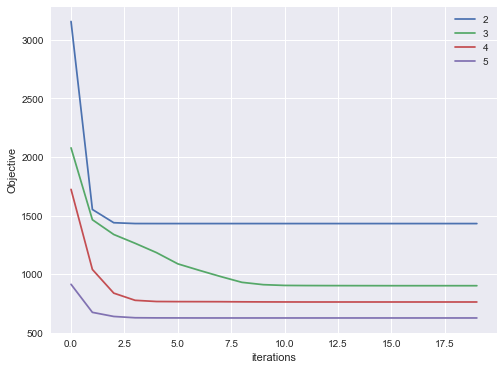

In [4]:
samples = np.array(samples)
K = range(2,6)
obj_all_k = []
centroids_k = []
final_clusters = []
plt.figure(figsize=(8,6))
for k in K:
    
    # Initialize centroids
    index = np.random.choice(range(500),k)
    centroids = samples[index]

    # Intialize clusters array
    c = np.zeros(500)
    obj_all=[]
    
    # Start Iterations
    for iteration in range(20):
        for i in range(500):
            norm=[]
            for cent in centroids:
                dist = (nplg.norm(samples[i]-cent,ord=2))**2
                norm.append(dist)

            norm=np.array(norm)
            cluster = np.argmin(norm)
            c[i]=cluster

    # Calculate objective function
        obj = 0
        for m in range(len(centroids)):
            diff = samples[np.where(c==m)] - np.repeat([centroids[m]],samples[np.where(c==m)].shape[0],axis=0)
            obj_cluster = np.sum(nplg.norm(diff,ord=2,axis=1)**2)
            obj = obj + obj_cluster

        obj_all.append(obj)

    # Re-calculate Centroids
        for j in range(len(centroids)):
            centroids[j] = np.sum(samples[np.where(c==j)],axis=0)/samples[np.where(c==j)].shape[0]
            
    final_clusters.append(c)
    centroids_k.append(centroids)  
    

    plt.plot(range(20),obj_all,label='clusters='+str(k))
    plt.xlabel("iterations")
    plt.ylabel("Objective")
    plt.legend()

## b) For K = 3; 5, plot the 500 data points and indicate the cluster of each for the final iteration by marking it with a color or a symbol.

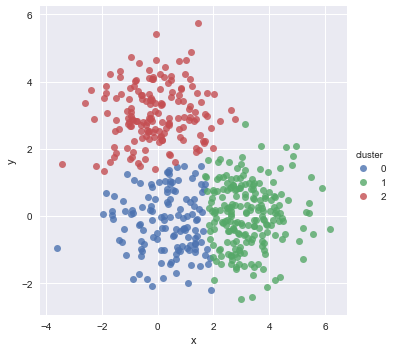

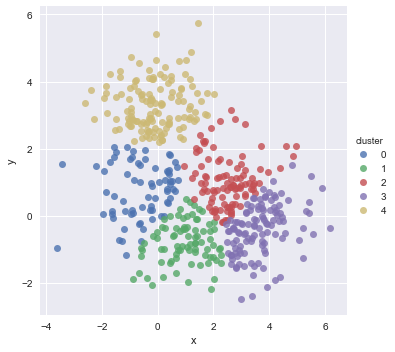

In [5]:

# clusters_3 = pd.DataFrame(samples)
clusters_3 = pd.DataFrame(np.concatenate((samples,np.transpose(np.matrix(final_clusters[1]))),1),columns=['x','y','cluster'])
clusters_3['cluster'] = clusters_3.cluster.astype('int').astype('category')

clusters_5 = pd.DataFrame(np.concatenate((samples,np.transpose(np.matrix(final_clusters[3]))),1),columns=['x','y','cluster'])
clusters_5['cluster'] = clusters_5.cluster.astype('int').astype('category')

_=sns.lmplot('x', 'y', data=clusters_3, hue='cluster', fit_reg=False)
_=sns.lmplot('x', 'y', data=clusters_5, hue='cluster', fit_reg=False)




# Problem - 2 (Matrix Factorization)

In [6]:
# import data

train = np.genfromtxt ('ratings.csv', delimiter=",")
test = np.genfromtxt ('ratings_test.csv', delimiter=",")

In [7]:
train_matrix = np.zeros((943,1682))

for i in range(train.shape[0]):
    train_matrix[int(train[i][0])-1][int(train[i][1])-1] = train[i][2]


In [8]:
# Since ratings cannot be 0 we replace all nan's with 0s so as to not use them

ind_matrix = train_matrix.copy()
ind_matrix[ind_matrix!=0]=1
np.sum(ind_matrix)


95000.0

In [15]:
def RMSE(u,v,test):
    s=0
    for i in range(test.shape[0]):
        pred=u[int(test[i][0])-1].dot(v[int(test[i][1])-1])
        s+=(pred-test[i][2])**2

    return (s/test.shape[0])**(0.5)


In [ ]:
N1 = train_matrix.shape[0]
N2 = train_matrix.shape[1]

sigma2 = 0.25
d = 10
lam = 1

mean = np.zeros(d)
cov = lam*np.diag(np.ones(d))
objective_all=[]
RMSE_all = []
for runs in range(10):
    
    # Initialize u and v
    u = np.random.multivariate_normal(mean,cov,N1)
    v = np.random.multivariate_normal(mean,cov,N2) 
    objective=[]


    for itr in range(100):
        
        # Update u
        
        for i in range(N1):
            sum1 = np.zeros((10,10))
            sum2 = np.zeros(10)

            for j in np.where(ind_matrix[i]==1)[0]:
                sum1 = sum1 + np.outer(v[j],v[j])
                sum2 = sum2 + (train_matrix[i][j])*v[j]

            u[i] = ((nplg.inv(sigma2*cov + sum1)).dot(sum2.reshape(10,1))).flatten()

        # Update v
        
        for i in range(N2):
            sum1 = np.zeros((10,10))
            sum2 = np.zeros(10)

            for j in np.where(ind_matrix[:,i]==1)[0]:
                sum1 = sum1 + np.outer(u[j],u[j])
                sum2 = sum2 + train_matrix[j][i]*u[j]

            v[i] = ((nplg.inv(sigma2*cov + sum1)).dot(sum2.reshape(10,1))).flatten()

        obj = -np.sum((1.0/(2*sigma2))*np.square(train_matrix - (u.dot(np.transpose(v)))*ind_matrix)) - np.sum((lam/2.0)*np.square(nplg.norm(u,2,1)))- np.sum((lam/2.0)*np.square(nplg.norm(v,2,1)))
        
        objective.append(obj)
        
    print(itr)  
    objective_all.append(objective)
    RMSE_all.append(RMSE(u,v,test))
    
    

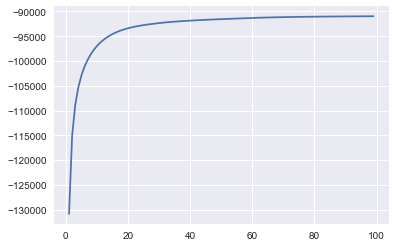

In [25]:
plt.plot(range(1,100),objective_all[0][1:])

In [27]:
RMSE_all

[1.1563327171286979]

## a) Run your code 10 times. For each run, initialize your ui and vj vectors as N(0; I) random vectors.